In [1]:
import numpy as np
from numpy.random import binomial, normal, beta, multinomial
import scipy.stats as st
from scipy.stats import invgamma, norm, dirichlet, multivariate_normal
import matplotlib.pyplot as plt
from distcan import InverseGamma
from matplotlib.lines import Line2D
import math
import seaborn as sns
import pandas as pd

In [71]:
def data_gen(mu, cov, phi, n):
    """
    Generates samples from Mixture of K Multivariate Gaussian Distributions
    """

    y = np.empty((n, 2))
    for i in range(n):
        ind = multinomial(1, phi)
        for j, val in enumerate(ind):
            if val == 1:
                y[i,:] = np.random.multivariate_normal(mu[j,:], cov[j,:,:])
            else:
                next
    return np.array(y)

In [78]:
# Define parameters for K=3 Mixture of Multivariate Gaussians
phi = [.3, .5, .2]
mu = np.array([[3,5], [0,2], [-2,5]])
cov_1 = np.array([[2.0, 0.3], [0.3, 0.5]])
cov_2 = np.array([[3.0,.4], [.4,3.0]])    
cov_3 = np.array([[1.7,-.7], [-.7,1.7]])
cov = np.stack((cov_1, cov_2, cov_3), axis = 0)


In [79]:
data = data_gen(mu, cov, phi, 500)
x, y = np.mgrid[-5:7.5:.1, -1:7.5:.1]
pos = np.dstack((x,y))



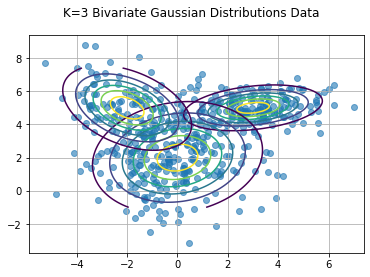

In [87]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], alpha = .6)
for i in range(len(mu)):
    ax.contour(x,y, multivariate_normal(mu[i,:], cov[i,:,:]).pdf(pos), extend='both')

fig.suptitle("K=3 Bivariate Gaussian Distributions Data")
ax.grid()
fig.show()

## Prior Distributions

$$
\begin{align*}
p(\pmb{\pi}) & \sim Dir(\pmb{\alpha})\\
p(\pmb{\mu}_j|\Sigma_j) & \sim N(\pmb{\xi_j}, \frac{\Sigma_j}{\kappa_j})\\
p(\Sigma_j) & \sim W^{-1}(v_j, \Lambda^{-1}_j)\\
\end{align*}
$$

Our choice of prior distributions $p(\pmb{\mu}_j|\Sigma_j) \sim N(\pmb{\xi_j}, \frac{\Sigma_j}{\kappa_j})$ and 
$p(\Sigma_j) \sim W^{-1}(v_j, \Lambda^{-1}_j)$ is known as the normal-inverse-Wishart which is the conjugate prior to the multivariate normal distribution and parameterized by $(\pmb{\xi_j}, v_j, \Lambda_j, \kappa_j)$. The parameters $v_j$ and $\Lambda_j$  describe the degrees of freedom and the scale matrix for the inverse-Wishart distribution of $\Sigma_j$.

## Complete Conditional for $p(\pmb{\mu_j})$ and $p(\Sigma_j)$

We know from our last post that 
$$p(\theta|x,z) \propto p(x, z| \theta)p(\pmb{\pi})\prod_{j=1}^k\left[p(\pmb{\mu_j})p(\Sigma_j)\right]$$ 
and we can define the joint prior density

$$
\begin{align*}
p(\mu_j, \Sigma_j) & \propto \left|\Sigma_j\right|^{-\frac{v_j + d}{2+1}}\exp\left(\frac{1}{2}tr(\Lambda_j\Sigma_j^{-1})- \frac{\kappa_j}{2}(\mu_j - \xi_j)^T\Sigma_{-1}(\mu_j - \xi_j)\right)
\end{align*}
$$

which leads to the conditional density

$$
\begin{align*}
p(\mu_j, \Sigma_j | z, x, \pi) & \propto \prod_{i=1}^N\phi_{\theta_j}(x_i)^{z_j}\left|\Sigma_j\right|^{-\frac{v_j + d}{2+1}}\exp\left(\frac{1}{2}tr(\Lambda_j\Sigma_j^{-1})- \frac{\kappa_j}{2}(\mu_j - \xi_j)^T\Sigma_{-1}(\mu_j - \xi_j)\right)
\end{align*}
$$

This results in multiplying our joint prior density with a multivariate normal. Because of conjugacy we know that this results in a posterior density of the same family (normal inverse-Wishart) with parameters:

$$
\begin{align*}
\mu_n & = \frac{\kappa_j}{\kappa_j + n_j}\xi_j + \frac{n_j}{\kappa_j + n_j}\bar{y}\\
\kappa_n & = \kappa_j + n_j\\
v_n & = v_j + n_j\\
\Lambda_n & = \Lambda_j + S + \frac{n_j\kappa_j}{\kappa_j + n_j}(\bar{y} - \xi_j)(\bar{y} - \xi_j)^T
\end{align*}
$$
